# Investigating Netflix Movies Duration

This is a first and small project that will showcase basics of data manipulation with Pandas.

The research question is the following:
    
    Does Netflix movies duration decline throughout years ?

To answer that question, I will start by creating a DataFrame containing my friend's data and then visualize the trend that suggest him the research question.

Then, I will use a Netflix dataset to further investigate the movies' duration throughout years.

Let's get started !

## My friend's data suggest a decline:

According to him, for the years from 2011 to 2020, the average movie durations are 103, 101, 99, 100, 100, 95, 95, 96, 93, and 90, respectively.

So, I want to plot this data to better visualize this trend. 

I will first create a Pandas DataFrame and plot data with a Seaborn lineplot:

In [1]:
# Create the years and durations lists
years = list(range(2011, 2021))
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

# Create a dictionary with the two lists
movie_dict = {"years":years, "durations":durations}

# Print the dictionary
movie_dict

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}

In [2]:
# Import pandas under its usual alias
import pandas as pd

# Create a DataFrame from the dictionary
durations_df = pd.DataFrame(movie_dict)

# Print the DataFrame
print(durations_df)

   years  durations
0   2011        103
1   2012        101
2   2013         99
3   2014        100
4   2015        100
5   2016         95
6   2017         95
7   2018         96
8   2019         93
9   2020         90


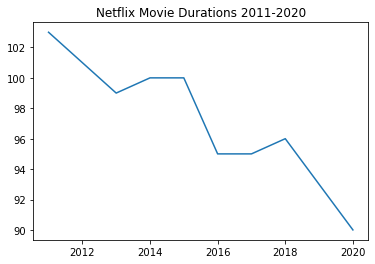

In [3]:
# Import matplotlib.pyplot under its usual alias and create a figure
import matplotlib.pyplot as plt
fig = plt.figure()

# Draw a line plot of release_years and durations
plt.plot(durations_df["years"], durations_df["durations"])

# Create a title
plt.title("Netflix Movie Durations 2011-2020")

# Show the plot
plt.show()

Well, visual inspection of this plot clearly show a decline! But my friend's data are aggregation of Netflix movies' duration. I am therefore limited in the further explorations I can perform. 

As a Data Scientist, there are a few questions about this trend that I am currently unable to answer, including:

    What does this trend look like over a longer period of time?
    Is this explainable by something like the genre of entertainment?

So, I grab a Netflix dataset and go to dig deeper:

## A deeper look at Netflix movies duration:

In [4]:
# Read in the CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

# Print the first five rows of the DataFrame
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


This is a bunch of data! 

I want to filter for movies in order to subset the DataFrame and prepare for a closer look at duration.

In [5]:
# Subset the DataFrame for type "Movie"
netflix_df_movies_only = netflix_df[netflix_df["type"]=="Movie"]

# Select only the columns of interest
netflix_movies_col_subset = netflix_df_movies_only[["title", "country", "genre", "release_year", "duration"]]

# Print the first five rows of the new DataFrame
netflix_movies_col_subset.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


Let's try visualizing the data again to inspect the data over a longer range of time. This time, I am no longer working with aggregates but instead with individual movies. A line plot is no longer a good choice for our data, so let's try a scatter plot instead:

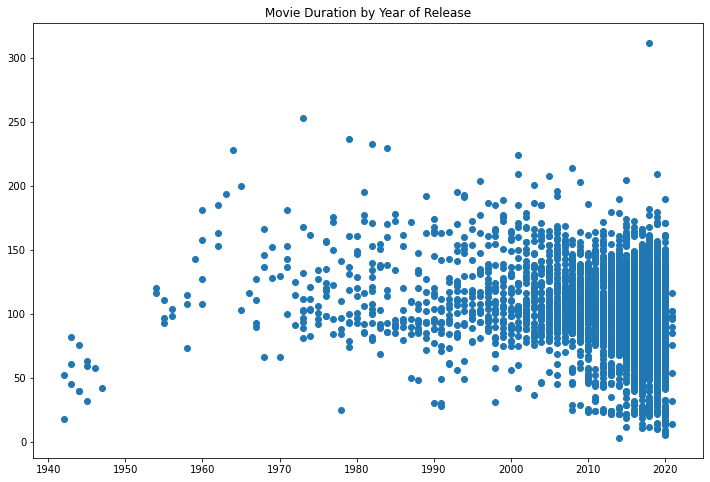

In [6]:
# Create a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus year
plt.scatter(netflix_movies_col_subset["release_year"], netflix_movies_col_subset["duration"])

# Create a title
plt.title("Movie Duration by Year of Release")

# Show the plot
plt.show()

This is already much more informative than the simple plot I created when my friend first gave me some data. I can also see that, while newer movies are overrepresented on the platform, many short movies have been released in the past two decades.

Upon further inspection, something else is going on. Some of these films are under an hour long! Let's filter our DataFrame for movies with a duration under 60 minutes and look at the genres. This might give me some insight into what is dragging down the average.

In [7]:
# Filter for durations shorter than 60 minutes
short_movies = netflix_movies_col_subset[netflix_movies_col_subset["duration"]<60]

# Print the first 20 rows of short_movies
short_movies.head(20)

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
162,A Christmas Special: Miraculous: Tales of Lady...,France,Uncategorized,2016,22
171,A Family Reunion Christmas,United States,Uncategorized,2019,29
177,A Go! Go! Cory Carson Christmas,United States,Children,2020,22
178,A Go! Go! Cory Carson Halloween,NaN,Children,2020,22
179,A Go! Go! Cory Carson Summer Camp,NaN,Children,2020,21


Interesting! It looks as though many of the films that are under 60 minutes fall into genres such as "Children", "Stand-Up", and "Documentaries". This is a logical result, as these types of films are probably often shorter than 90 minute Hollywood blockbuster. 

## How these non-feature films affect the movies duration throughout years ?

I could eliminate these rows from our DataFrame and plot the values again. But another interesting way to explore the effect of these genres on our data would be to plot them, but mark them with a different color. Just do it!

In [8]:
# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for index, row in netflix_movies_col_subset.iterrows():
    if row["genre"]=="Children" :
        colors.append("red")
    elif row["genre"]=="Documentaries" :
        colors.append("blue")
    elif row["genre"]=="Stand-up" :
        colors.append("green")
    else:
        colors.append("black")
        
# Inspect the first 10 values in your list        
print(colors[:10])

['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'blue']


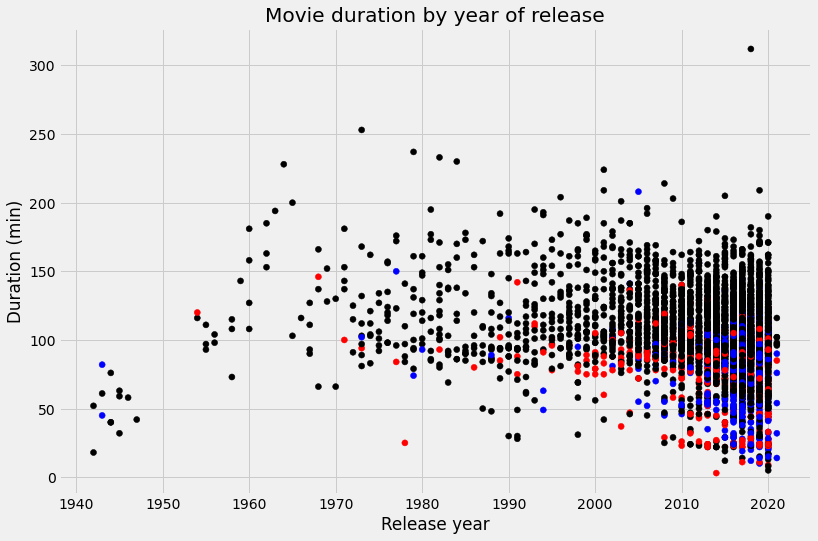

In [9]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies_col_subset["release_year"], netflix_movies_col_subset["duration"], c=colors)

# Create a title and axis labels
plt.title("Movie duration by year of release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")

# Show the plot
plt.show()

Well, as I suspected, non-typical genres such as children's movies and documentaries are all clustered around the bottom half of the plot.

## Does Netflix movies duration really decline throughout years ?

I now eliminate those rows and plot the average movies duration over years, adding my friend's line plot, in red, for a better comparison of the trend:

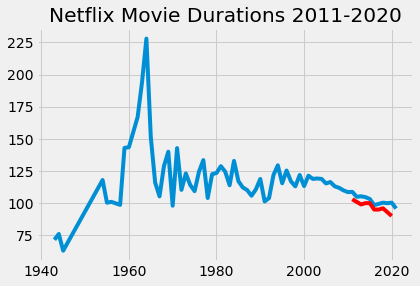

In [10]:
# Drop movies with durations shorter than 60 minutes
netflix_movies = netflix_movies_col_subset.drop(labels = short_movies.index)

# Group by years and average movies duration
avg_netflix_movies_duration = netflix_movies.groupby(by="release_year")["duration"].mean()

# Draw a line plot of release_years and durations
plt.plot(avg_netflix_movies_duration.index, avg_netflix_movies_duration)

# Add my friend's line plot in red
plt.plot(durations_df["years"], durations_df["durations"], color='red')

# Create a title
plt.title("Netflix Movie Durations 2011-2020")

# Show the plot
plt.show()

Interesting! This visualization shows indeed a decline trend in Netflix movies duration in the past years. But this trend is less important with a closer look at the data! It appears my friend's data includes non-feature films of durations less than 60 minutes. This has the effect of decreasing the average durations of my friend's data. The real trend is that movies duration is closer than 100 minutes and not as much under 100 minutes as my friend might guess! There are still hours of movies to watch in the Netflix platform!